**Calculation in the form of Code**

Importing the Packages and loading the CSV file

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Load the dataset to run the calculations
data = pd.read_csv("mlb_players_18.csv")

Categorizing the players

In [ ]:
# Removing all the pitcher position players from the data
data = data[data['position'] != 'P']

# Making the required groups for outfield, infield, catcher positions
outfield = data[data['position'].isin(['CF', 'LF', 'RF'])]['OBP']
infield = data[data['position'].isin(['1B', '2B', '3B', 'SS'])]['OBP']
catcher = data[data['position'] == 'C']['OBP']

# To understand degree of the freedom of the data we are counting the no.of players
position_counts = data['position'].value_counts()

# Counting the number of infielders
infielders_count = position_counts.get('1B', 0) + position_counts.get('2B', 0) + position_counts.get('3B', 0) + position_counts.get('SS', 0)

# Counting the number of outfielders
outfielders_count = position_counts.get('CF', 0) + position_counts.get('LF', 0) + position_counts.get('RF', 0)

# Counting the number of catchers
catchers_count = position_counts.get('C', 0)

print("Division of the players from the DATA:")
print("Number of infielders:", infielders_count)
print("Number of outfielders:", outfielders_count)
print("Number of catchers:", catchers_count)


Division of the players from the DATA:
Number of infielders: 288
Number of outfielders: 225
Number of catchers: 115


**ANOVA Analysis **

In [ ]:
# ANOVA Analysis
f_statistic, p_value = stats.f_oneway(outfield, infield, catcher)
df_between = 2
df_within = len(data) - 3

Calculating all the required Values

In [ ]:
# Calculating Total Sum of Squares (SS_total)
overall_mean = np.mean(data['OBP'])
total_sum_of_squares = np.sum((data['OBP'] - overall_mean) ** 2)

# Calculating Sum of Squares Between Groups (SS_between)
group_means = [np.mean(group) for group in [outfield, infield, catcher]]
sum_of_squares_between = np.sum([len(group) * (mean - overall_mean) ** 2 for mean, group in zip(group_means, [outfield, infield, catcher])])

# Calculating Sum of Squares Within Groups (SS_within)
sum_of_squares_within = total_sum_of_squares - sum_of_squares_between

# Calculating Mean Square Between Groups (MS_between)
mean_square_between = sum_of_squares_between / df_between

# Calculating Mean Square Within Groups (MS_within)
mean_square_within = sum_of_squares_within / df_within

print("ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-value:", p_value)
print("Degrees of Freedom (Between Groups):", df_between)
print("Degrees of Freedom (Within Groups):", df_within)
print("Sum of Squares Between Groups:", sum_of_squares_between)
print("Mean Square Between Groups:", mean_square_between)
print("Sum of Squares Within Groups:", sum_of_squares_within)
print("Mean Square Within Groups:", mean_square_within)



ANOVA Results:
F-Statistic: 3.0503105803555925
P-value: 0.048049684001002554
Degrees of Freedom (Between Groups): 2
Degrees of Freedom (Within Groups): 625
Sum of Squares Between Groups: 0.030202820942490403
Mean Square Between Groups: 0.015101410471245202
Sum of Squares Within Groups: 3.0942362411594204
Mean Square Within Groups: 0.004950777985855073


ANOVA Analysis PLOTS

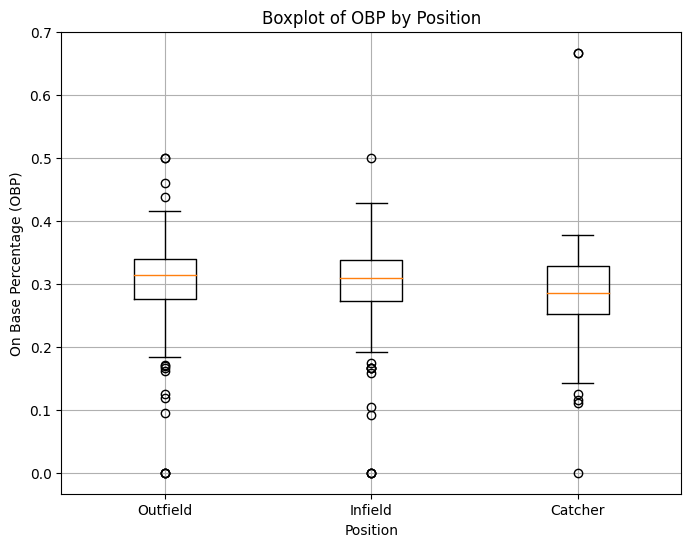

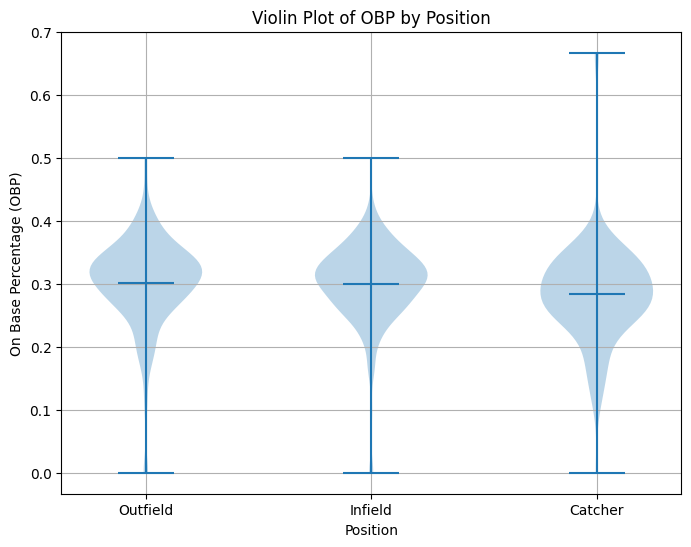

In [ ]:
# Box and Whisker Plot for ANOVA
plt.figure(figsize=(8, 6))
plt.boxplot([outfield, infield, catcher], labels=['Outfield', 'Infield', 'Catcher'])
plt.title('Boxplot of OBP by Position')
plt.ylabel('On Base Percentage (OBP)')
plt.xlabel('Position')
plt.grid(True)
plt.show()
print()

# Violin Plot for ANOVA
plt.figure(figsize=(8, 6))
plt.violinplot([outfield, infield, catcher], showmeans=True)
plt.xticks([1, 2, 3], ['Outfield', 'Infield', 'Catcher'])
plt.title('Violin Plot of OBP by Position')
plt.ylabel('On Base Percentage (OBP)')
plt.xlabel('Position')
plt.grid(True)
plt.show()


**Regression Analysis**

In [ ]:

# Regression - Giving X, Y values
X = data[['AVG', 'SLG', 'OPS']]
Y = data['OBP']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# Getting the results of the regression analysis
print("Regression Results:")
print(model.summary())



Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    OBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.249e+06
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        05:44:12   Log-Likelihood:                 3956.9
No. Observations:                 628   AIC:                            -7906.
Df Residuals:                     624   BIC:                            -7888.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.92e-05   7.72e-05

Calculating P-values of AVG, SLG, OPS

In [ ]:
# Extracting p-values for AVG, SLG, OPS and Adjusted R-squared
p_values = model.pvalues
adjusted_r_squared = model.rsquared_adj

# Print the p-values for AVG, SLG, OPS
print("\nAVG: p-value:", p_values['AVG'])
print("SLG: p-value:", p_values['SLG'])
print("OPS: p-value:", p_values['OPS'])
print("Adjusted R-squared:", adjusted_r_squared)




AVG: p-value: 0.7654359303683201
SLG: p-value: 0.0
OPS: p-value: 0.0
Adjusted R-squared: 0.9999601880819362


Regression Analysis Plot

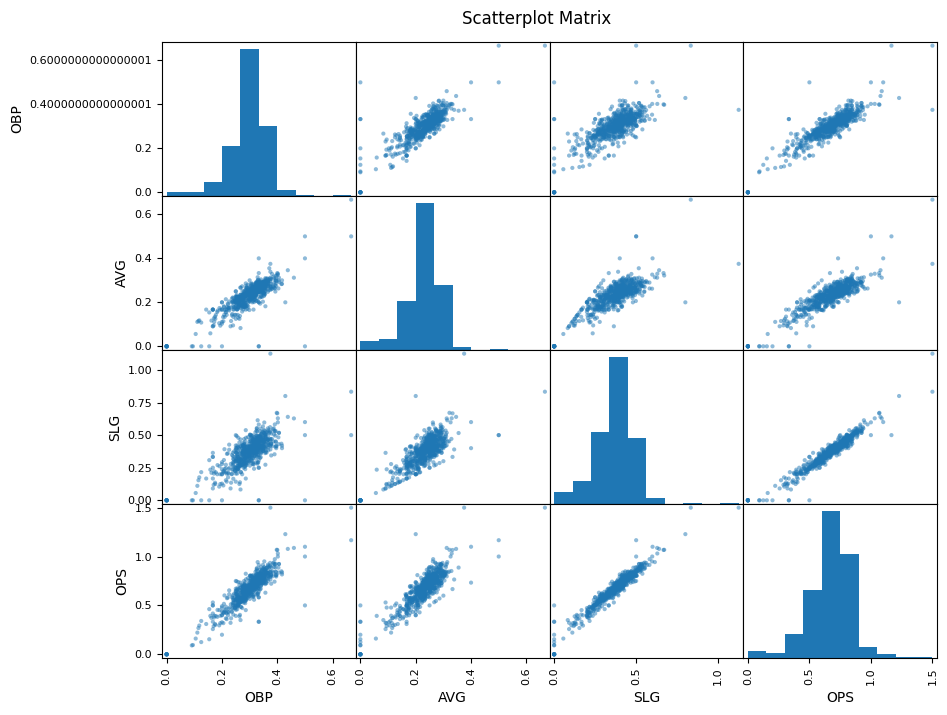

In [ ]:
# Scatterplot matrix for Regression
pd.plotting.scatter_matrix(data[['OBP', 'AVG', 'SLG', 'OPS']], figsize=(10, 8))
plt.suptitle('Scatterplot Matrix', y=0.92)
plt.show()
